# **Test Assignment - The Van Westendorp Pricing Model**
## **Davit Davtyan**

### **Intro**

I decided to implement the Van Westendorp Price Sensitivity Meter (PSM) method. 

**Hypothetical Case:** I am researching the price sensitivity for a new smartwatch.

**My Assumptions:**
- The target audience consists of tech-aware individuals aged 25-40.
- The price responses follow a normal distribution with some variation.
- The sample size is 200 respondents.

**Questions:**
Participants are asked the following four questions:

- **Too Expensive:** At what price would you consider the product to be too expensive and would not consider buying it?
- **Too Cheap:** At what price would you consider the product to be so cheap that you would question its quality and not buy it?
- **Expensive but Acceptable:** At what price would you consider the product to be expensive but still buy it?
- **Bargain:** At what price would you consider the product to be a bargain, getting a good deal for the price?

#### **1. Generate the synthetic data**

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from intersect import intersection

In [146]:
def generate_synthetic_data(num_responses=300):
    np.random.seed(42)
    too_cheap = np.random.normal(150, 100, num_responses)  
    cheap = np.random.normal(250, 100, num_responses)    
    expensive = np.random.normal(350, 100, num_responses)  
    too_expensive = np.random.normal(450, 150, num_responses) 
    
    too_cheap = np.clip(too_cheap, 0, None)
    cheap = np.clip(cheap, 0, None)
    expensive = np.clip(expensive, 0, None)
    too_expensive = np.clip(too_expensive, 0, None)

    data = pd.DataFrame({
        'too_cheap': too_cheap,
        'cheap': cheap,
        'expensive': expensive,
        'too_expensive': too_expensive,
    })
    return data

#### **2. Define the function for the analysis** 

In [161]:
def van_westendorp_analysis(data):
    sorted_data = {
        'too_expensive': np.sort(data['too_expensive']),
        'too_cheap': np.sort(data['too_cheap']),
        'expensive': np.sort(data['expensive']),
        'cheap': np.sort(data['cheap']),
    }
    n = len(data)
    
    cumulative_percent = np.arange(1, n + 1) / n * 100
    
    return sorted_data, cumulative_percent

#### **3. Define functions for plotting the results** 

In [188]:
def find_intersections(sorted_data, cumulative_percent):
    x1, y1 = sorted_data['too_cheap'], 100 - cumulative_percent
    x2, y2 = sorted_data['expensive'], cumulative_percent
    pmc_x, pmc_y = intersection(x1, y1, x2, y2)

    x1, y1 = sorted_data['cheap'], 100 - cumulative_percent
    x2, y2 = sorted_data['too_expensive'], cumulative_percent
    pme_x, pme_y = intersection(x1, y1, x2, y2)

    x1, y1 = sorted_data['too_cheap'], 100 - cumulative_percent
    x2, y2 = sorted_data['too_expensive'], cumulative_percent
    opp_x, opp_y = intersection(x1, y1, x2, y2)

    return pmc_x[0], pme_x[0], opp_x[0], pmc_y[0], pme_y[0], opp_y[0] if pmc_x.size and pme_x.size and opp_x.size else (None, None, None, None, None, None)


def plot_van_westendorp(sorted_data, cumulative_percent):
    plt.figure(figsize=(16, 9))
    
    plt.plot(sorted_data['too_expensive'], cumulative_percent, label='Too Expensive', color='purple')
    plt.plot(sorted_data['too_cheap'], 100 - cumulative_percent, label='Too Cheap', color='red')
    plt.plot(sorted_data['expensive'], cumulative_percent, label='Expensive but Acceptable', color='blue')
    plt.plot(sorted_data['cheap'], 100 - cumulative_percent, label='Cheap', color='orange')
    
    plt.xlabel('Price ($)')
    plt.ylabel('Cumulative Percentage (%)')
    plt.title('Van Westendorp Price Sensitivity Meter')
    plt.legend()
    plt.grid(True)

    pmc_x, pme_x, opp_x, pmc_y, pme_y, opp_y = find_intersections(sorted_data, cumulative_percent)

    if pmc_x and pme_x:
        plt.axvspan(pmc_x, pme_x, color='gray', alpha=0.3, label='Acceptable Price Range')

    if pmc_x:
        plt.scatter(pmc_x, pmc_y, color='black', s=50, marker='o', label='PMC Point')
    if pme_x:
        plt.scatter(pme_x, pme_y, color='blue', s=50, marker='o', label='PME Point')
    if opp_x:
        plt.scatter(opp_x, opp_y, color='green', s=50, marker='o', label='OPP Point')

    plt.legend()
    plt.show()

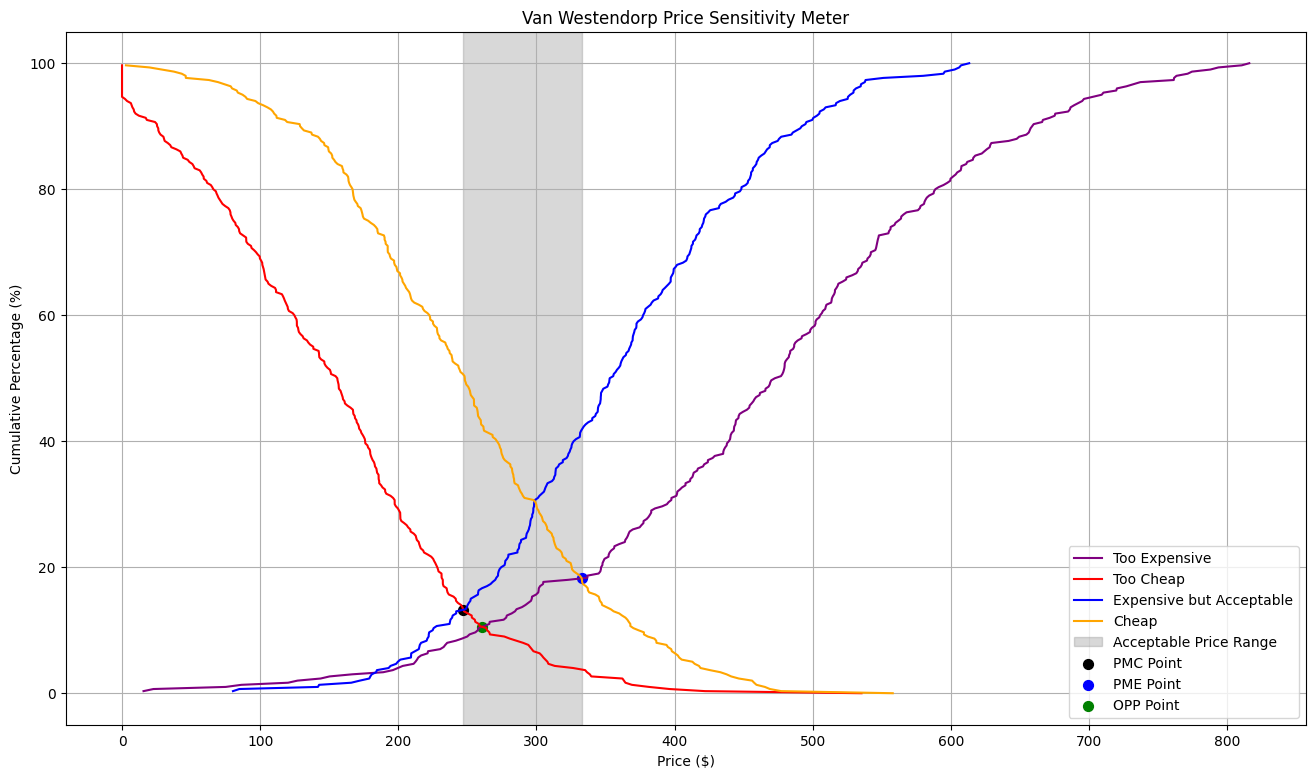

In [189]:
data = generate_synthetic_data()
sorted_data, cumulative_percent = van_westendorp_analysis(data)
plot_van_westendorp(sorted_data, cumulative_percent)